In [1]:
from cmath import *
import matplotlib.pyplot as plt
from IPython.display import SVG
import numpy as np
import sympy as sp
from anastruct import SystemElements

<h1 align="center"> Задача №2. Прямой поперечный изгиб </h1>

Расчёт выполнен в программе Jupiter Notebook. Язык программирования Python 3.

<h2> 1. Исходные данные </h2>

<h3> Вариант №21 </h3>
<h3> Тимофеев М.В., ПГС-17 </h3>

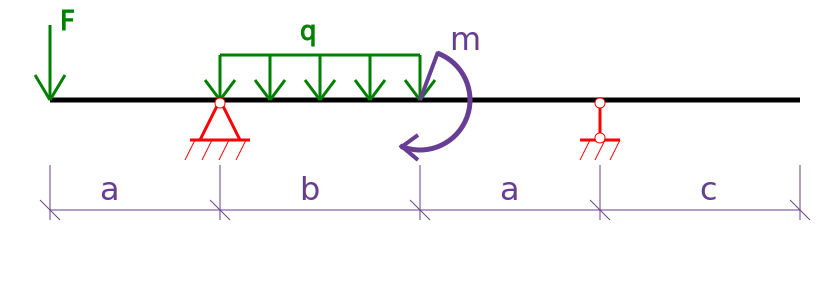

In [2]:
# Отображение расчётной схемы
def show_svg(file_name):
    return SVG(filename=file_name)
show_svg('1_Jupiter/Scheme_2.svg')

<h3> Требуется: </h3></br>
1. Определить опорные реакции; </br>
2. Построить эпюры внутренних усилий и и определить первое опасное сечение; </br>
3. Из условия прочности определить размеры поперечного сечения в двух вариантах: </br>
- Прямоугольник с соотношением сторон h/b=3; </br>
- Прокатный двутавр.

In [3]:
R = 200.e6  # Па
a = 4.  # м
b = 2.  # м
c = 2.  # м
F = 12.e3  # Н
q = 4.e3  # Н
m = 6.e3  # Н
E = 2.05e11

<h2> 2. Построение эпюр внутренних силовых факторов </h2>

<h3> 2.1 Определяем реакции опор: </h3>
Для определения реакций опор запишем уравнения равновесия сил на ось Y и моментов относительно левой опоры (а). Продольные силы отсутствуют.</br>
Принимаем, что реакции опор направлены вверх.

$\sum$ Y = 0:   $F + q\cdot b - R_y^a - R_y^b = 0$

$\sum$ Mz = 0:  $F\cdot a - q\cdot b\cdot 0.5\cdot b - m + R_y^b\cdot (a+b)$

In [4]:
# Решение системы уравнений
Ry_a, Ry_b = sp.symbols('Ry_a Ry_b')
system = [F + q*b - Ry_a - Ry_b, F*a - q*b*0.5*b - m + Ry_b*(a+b)]
Ry = sp.solve(system, Ry_a, Ry_b)
Ry

{Ry_a: 25666.6666666667, Ry_b: -5666.66666666667}

Реакция на правой опоре получилась со знаком минус. Следовательно, реакция направлена вниз.

<b> 2.2 Проверки найденных реакций опор: </b> </br>
Подставляем полученные значения реакций в уравнение равновесия сил в проекции на ось Y

In [5]:
F + q*b - Ry[Ry_a] - Ry[Ry_b]

-9.09494701772928e-13

Сумма сил = 0, проверка выполнена

Подставляем полученные значения реакций в уравнение равновесия моментов

In [6]:
F*a - q*b*0.5*b - m + Ry[Ry_b]

28333.3333333333

Сумма моментов = 0, проверка выполнена

<h3> 2.3 Эпюра перерезывающих сил: </h3>

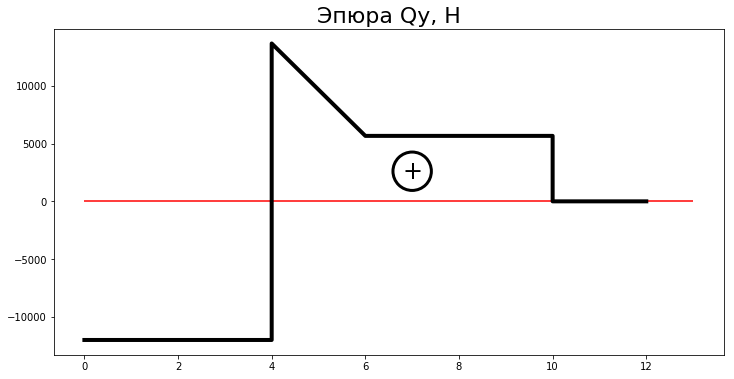

In [7]:
# Построение эпюры Q
x = [0,   a,      a,          a+b,                 a+b+a,                  a+b+a,                   a+b+a+c]
y = [-F, -F, -F+Ry[Ry_a],  -F+Ry[Ry_a]-q*b,    -F+Ry[Ry_a]-q*b,    -F+Ry[Ry_a]-q*b+Ry[Ry_b], -F+Ry[Ry_a]-q*b+Ry[Ry_b]]

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
ax.plot(x, y, linestyle = '-', linewidth = 4, color = 'black')

box_2 = {'facecolor':'white',
         'edgecolor': 'black',
         'boxstyle': 'circle',
         'linestyle': '-',     #  начертание линии
         'linewidth': '3'}     #  толщина линии

ax.text(7, 2000, '+',
        bbox = box_2,
        horizontalalignment = 'center',    #  горизонтальное выравнивание
        color = 'black',
        fontsize = 24)

ax.hlines(0, 0, 13, color = 'r')
plt.title('Эпюра Qy, Н', fontsize=22)
plt.show()

<h3> 2.4 Эпюра изгибающих моментов: </h3>

<b> Участок №1: </b> 0 <= x <= a

In [8]:
n = 3  # количество точек на участке
x_1 = [a/n*i for i in range(n+1)]
Mz_1 = list(map(lambda x: F*x, x_1))

<b> Участок №2: </b> 0 <= x <= b

In [9]:
n = 10  # количество точек на участке
x_2 = [b/n*i for i in range(n+1)]
Mz_2 = list(map(lambda x: F*(a+x) + 0.5*q*x*x - Ry[Ry_a]*x, x_2))
x_2 = [a + b/n*i for i in range(n+1)]

<b> Участок №3: </b> 0 <= x <= a

In [10]:
n = 3  # количество точек на участке
x_3 = [a/n*i for i in range(n+1)]
Mz_3 = list(map(lambda x: F*(a+b+x) + q*b*(0.5*b+x) - Ry[Ry_a]*(b+x) - m, x_1))
x_3 = [a + b+ a/n*i for i in range(n+1)]

<b> Участок №4: </b> 0 <= x <= c

In [11]:
n = 3  # количество точек на участке
x_4 = [c/n*i for i in range(n+1)]
Mz_4 = list(map(lambda x: F*(a+b+a+x) + q*b*(0.5*b+a+x) - Ry[Ry_a]*(b+a+x) - m - Ry[Ry_b]*x, x_4))
x_4 = [a + b + a + c/n*i for i in range(n+1)]

In [12]:
x = x_1 + x_2 + x_3 + x_4
y = Mz = Mz_1 + Mz_2 + Mz_3 + Mz_4

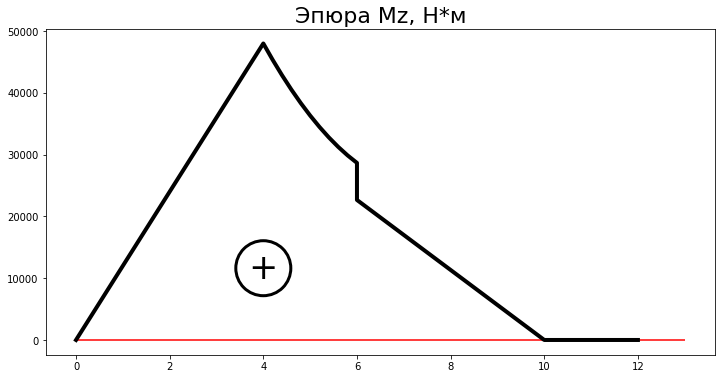

In [13]:
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
ax.plot(x, y, linestyle = '-', linewidth = 4, color = 'black')

box_2 = {'facecolor':'white',
         'edgecolor': 'black',
         'boxstyle': 'circle',
         'linestyle': '-',     #  начертание линии
         'linewidth': '3'}     #  толщина линии

ax.text(4, 10000, '+',
        bbox = box_2,
        horizontalalignment = 'center',    #  горизонтальное выравнивание
        color = 'black',
        fontsize = 35)

ax.hlines(0, 0, 13, color = 'r')
plt.title('Эпюра Mz, Н*м', fontsize=22)
plt.show()

<h2> 3. Определение опасного сечения по нормальным напряжениям. Определение размеров поперечного сечения балки </h2>

Максимальный момент в балке:

In [14]:
Mz_max = max(Mz)
Mz_max  # Н*м

48000.0

<h3> 3.1 Определение размеров сечения балки (бруса прямоугольного сечения) </h3>

Требуемый момент сопротивления:

In [15]:
W_req = Mz_max/R
W_req*1.e6  # см3

240.0

Определяем размеры прямоугольного сечения (высота, ширина):

In [16]:
h_, b_ = sp.symbols('h_ b_')
system = [h_/b_ - 3, W_req - b_*h_**2/6.]
[h_, b_] = sp.solve(system, h_, b_)[0]
h_, b_  # м

(0.162865056995694, 0.0542883523318981)

Момент инерции сечения:

In [17]:
Iz = b_*h_**3./12.
Iz  # м4

1.95438068394833e-5

Площадь сечения:

In [18]:
A_sec = b_*h_  # м2

<h3> 3.2 Определение размеров поперечного сечения двутавра: </h3>

По СТО АСЧМ 20-93 принимаем двутавр 25Б1. Момент сопротивления 285.3 см3, площадь сечения 32.68 см2

In [19]:
Wz_2tawr = 285.3*1.e-6  # м3
A_2tawr = 32.68*1.e-4  # м2

Фактические нормальные напряжения в двутавре, МПа:

In [20]:
Sigma_2tawr = Mz_max / Wz_2tawr
Sigma_2tawr/1.e6  # МПа

168.24395373291273

Коэффициент использования:

In [21]:
Kmax = Sigma_2tawr / R
Kmax

0.8412197686645636

Сравнение масс 2-х вариантов между собой по массе:

In [22]:
A_2tawr / A_sec

0.369613198793006

Двутавр значительно (более чем в 2 раза) выгоднее бруса прямоугольного сечения

<h2> 4. Проверка с помощью Метода Конечных Элементов (МКЭ) </h2>

Используем библиотеку <b> anastruct </b>. Правила знаков - машиностроительные.

In [23]:
E*A_sec, E*Iz

(1812543497.33107, 4006480.40209408)

In [24]:
# Характеристики стержней
se = SystemElements(EA=1812543497.33, EI=4006480.40)

# Добавляем стержни
se.add_element(location=[[0, 0], [a, 0]])
se.add_element(location=[[a, 0], [a+b, 0]])
se.add_element(location=[[a+b, 0], [a+b+a, 0]])
se.add_element(location=[[a+b+a, 0], [a+b+a+c, 0]])

# Добавляем заделку
se.add_support_hinged(node_id=2)
se.add_support_roll(node_id=4)

# Добавляем нагрузки
se.point_load(Fy=-F, node_id=1)
se.moment_load(node_id=3, Ty=-m)
se.q_load(q=-q, element_id=2, direction='element')

# Выполняем расчёт
se.solve();

<b> Расчётная схема: </b>

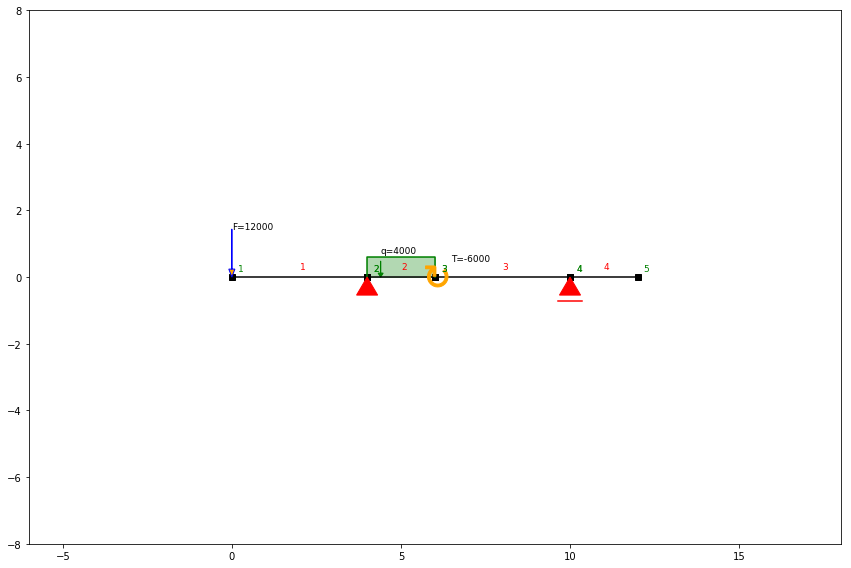

In [25]:
se.show_structure()

<b> Реакции опор: </b>

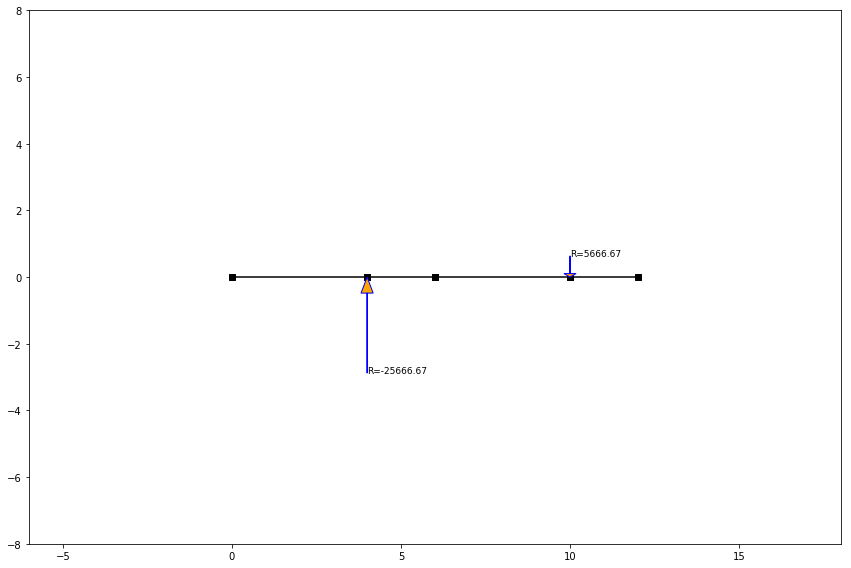

In [26]:
se.show_reaction_force()

<b> Поперечная сила, Н: </b>

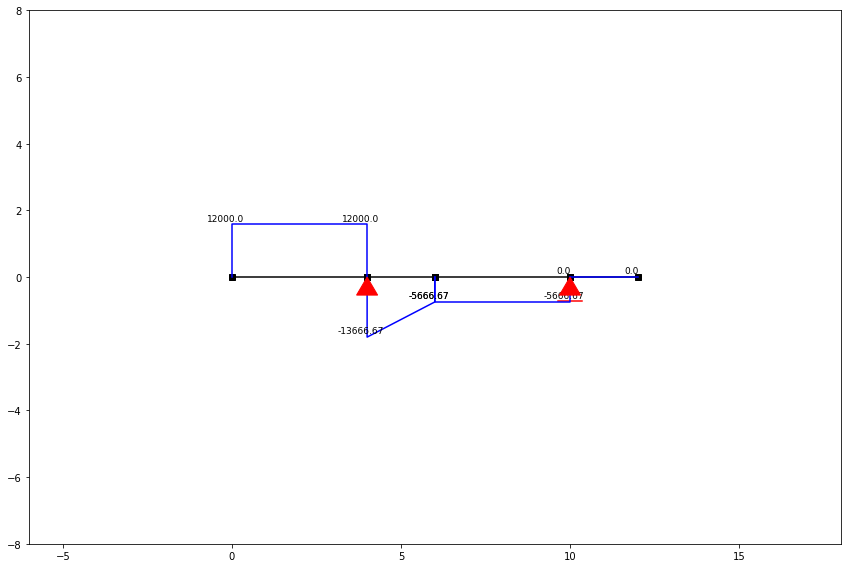

In [27]:
se.show_shear_force()

<b> Изгибающий момент, Н*м </b>

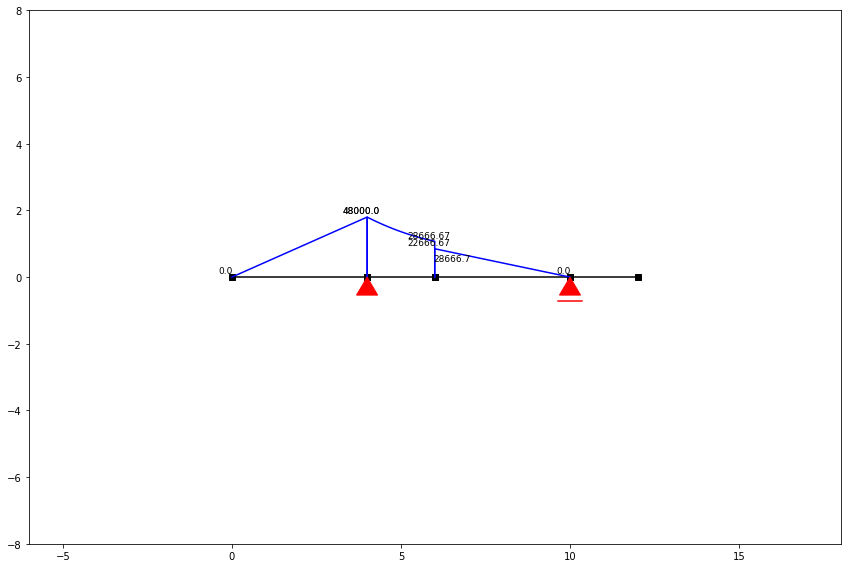

In [28]:
se.show_bending_moment()

<b> Перемещения, м </b>

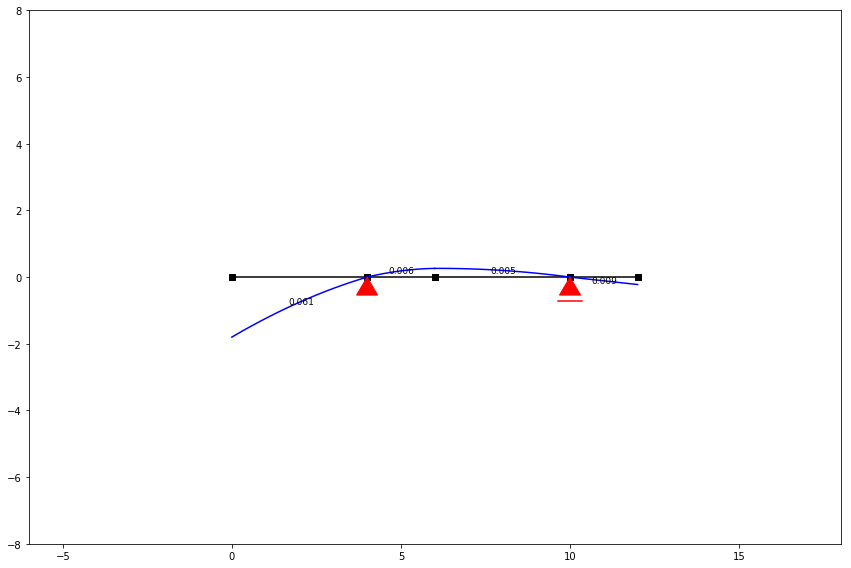

In [29]:
se.show_displacement()

<h2> Заключение: результаты численного расчёта по усилиям совпали с результатами ручного расчёта. </h2>